In [1]:
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import corner
from chainconsumer import Chain, ChainConsumer
from astropy.io import ascii


In [2]:
cosmos2020_bright = Table. read("cosmo_reduced.fits" , format= "fits", memmap = True)

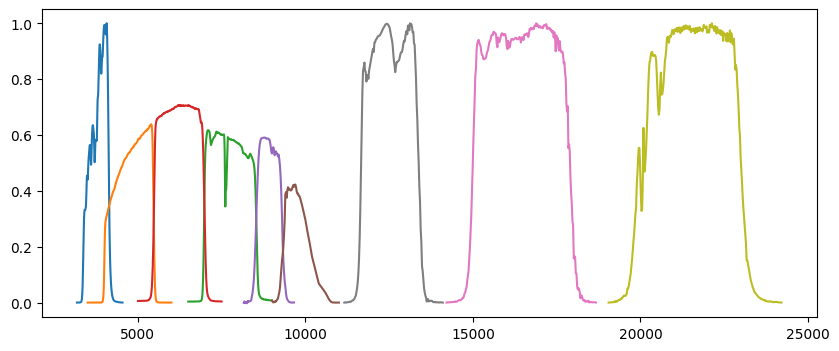

In [3]:
wave1, flux1 = np.loadtxt("filters/CFHT_u.txt", unpack=True)
wave2,flux2 = np.loadtxt("filters/HSC_g.txt", unpack=True)
wave3,flux3 = np.loadtxt("filters/HSC_i.txt", unpack=True)
wave4,flux4 = np.loadtxt("filters/HSC_r.txt", unpack=True)
wave5,flux5 = np.loadtxt("filters/HSC_y.txt", unpack=True)
wave6,flux6 = np.loadtxt("filters/HSC_z.txt", unpack=True)
wave7, flux7 = np.loadtxt("filters/UVISTA_H.txt", unpack = True)
wave8, flux8 = np.loadtxt("filters/UVISTA_J.txt", unpack = True)
wave9, flux9 = np.loadtxt("filters/UVISTA_Ks.txt", unpack = True)

plt.figure(figsize=(10,4))
plt.plot(wave1,flux1, label = "CFHT u")
plt.plot(wave2,flux2, label = "HSC g")
plt.plot(wave3,flux3, label = "HSC i")
plt.plot(wave4,flux4, label = "HSC r")
plt.plot(wave5,flux5, label = "HSC y")
plt.plot(wave6,flux6, label = "HSC z")
plt.plot(wave7,flux7, label = "UVISTA H")
plt.plot(wave8,flux8, label = "UVISTA J")
plt.plot(wave9,flux9, label = "UVISTA Ks")

In [3]:
central_wave = [3823.29 , 4816.12 , 7740.58 , 6234.11 , 9779.93 , 9125.20 , 12534.65]

In [4]:
indices = [123456, 43, 12345, 23456, 234, 76543, 987]
random = ['CFHT_u_FLUX_AUTO', 'HSC_g_FLUX_AUTO', 'HSC_i_FLUX_AUTO',
           'HSC_r_FLUX_AUTO', 'HSC_y_FLUX_AUTO', 'HSC_z_FLUX_AUTO', 'UVISTA_J_FLUX_AUTO']

random_bright_normalized = [
    cosmos2020_bright[i][r] / cosmos2020_bright[i]['HSC_i_FLUX_AUTO']
    for i, r in zip(indices, random)
]


In [5]:
mask0 = cosmos2020_bright['lp_zBEST']>=4
cosmos2020_bright0 = cosmos2020_bright[mask0]
len(cosmos2020_bright0)

6674

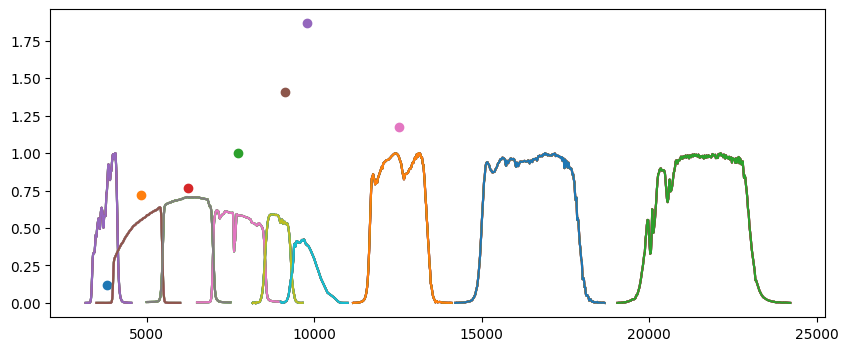

In [7]:
plt.figure(figsize=(10,4))
for w_c , f in zip(central_wave, random_bright_normalized):
    plt.scatter(w_c , f)
    plt.plot(wave1,flux1, label = "CFHT u")
    plt.plot(wave2,flux2, label = "HSC g")
    plt.plot(wave3,flux3, label = "HSC i")
    plt.plot(wave4,flux4, label = "HSC r")
    plt.plot(wave5,flux5, label = "HSC y")
    plt.plot(wave6,flux6, label = "HSC z")
    plt.plot(wave7,flux7, label = "UVISTA H")
    plt.plot(wave8,flux8, label = "UVISTA J")
    plt.plot(wave9,flux9, label = "UVISTA Ks")

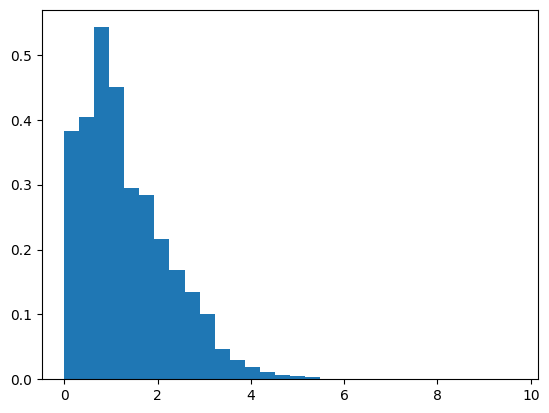

In [6]:
counts0, bins0,_ = plt.hist(cosmos2020_bright['lp_zBEST'] , 30, density = True)

In [7]:
mask2 = cosmos2020_bright['FLAG_COMBINED']==0 #selecting innner images
cosmos2020_bright_mask2 = cosmos2020_bright[mask2]
mask3 =cosmos2020_bright_mask2['HSC_i_IMAFLAGS_ISO'] <=3 #within inner

In [8]:
cosmos2020_bright_mask3 = cosmos2020_bright_mask2[mask3]

In [10]:
mask4 = cosmos2020_bright_mask3['lp_type'] ==0
cosmos2020_bright_mask4 = cosmos2020_bright_mask3[mask4]

nan
1.1352


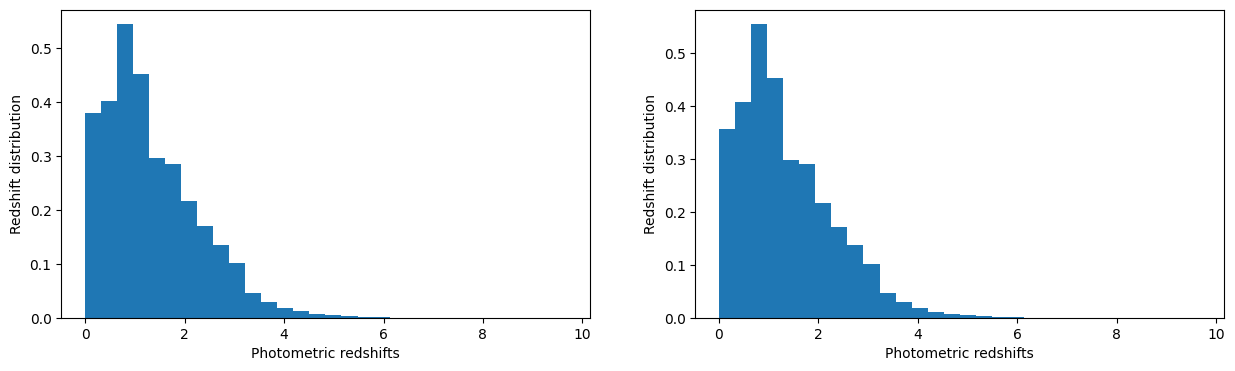

In [12]:

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
counts1, bins1, _= plt.hist(cosmos2020_bright_mask3['lp_zBEST'], 30, density=True)
plt.xlabel("Photometric redshifts")
plt.ylabel("Redshift distribution")
plt.subplot(1,2,2)
counts2, bins2, _= plt.hist(cosmos2020_bright_mask4['lp_zBEST'], 30, density=True)
plt.xlabel("Photometric redshifts")
plt.ylabel("Redshift distribution")
#as seen no changes. Since we want sources with reliable reshifts we already applied 3 masks, and now we have applied 4th mask 
#to make our selectiion more reliable
#that is, the selection of photometrc measurements are more reliable
#??
print(np.median(cosmos2020_bright_mask3['lp_zBEST']))
print(np.median(cosmos2020_bright_mask4['lp_zBEST']))

In [13]:
mask5 = cosmos2020_bright_mask4['HSC_i_MAG_AUTO'] < 22.5
cosmos2020_bright_mask5 = cosmos2020_bright_mask4[mask5]

In [14]:
print(len(cosmos2020_bright))
print(len(cosmos2020_bright_mask2))
print(len(cosmos2020_bright_mask3))
print(len(cosmos2020_bright_mask4))
print(len(cosmos2020_bright_mask5))

704616
538687
537122
527623
25938


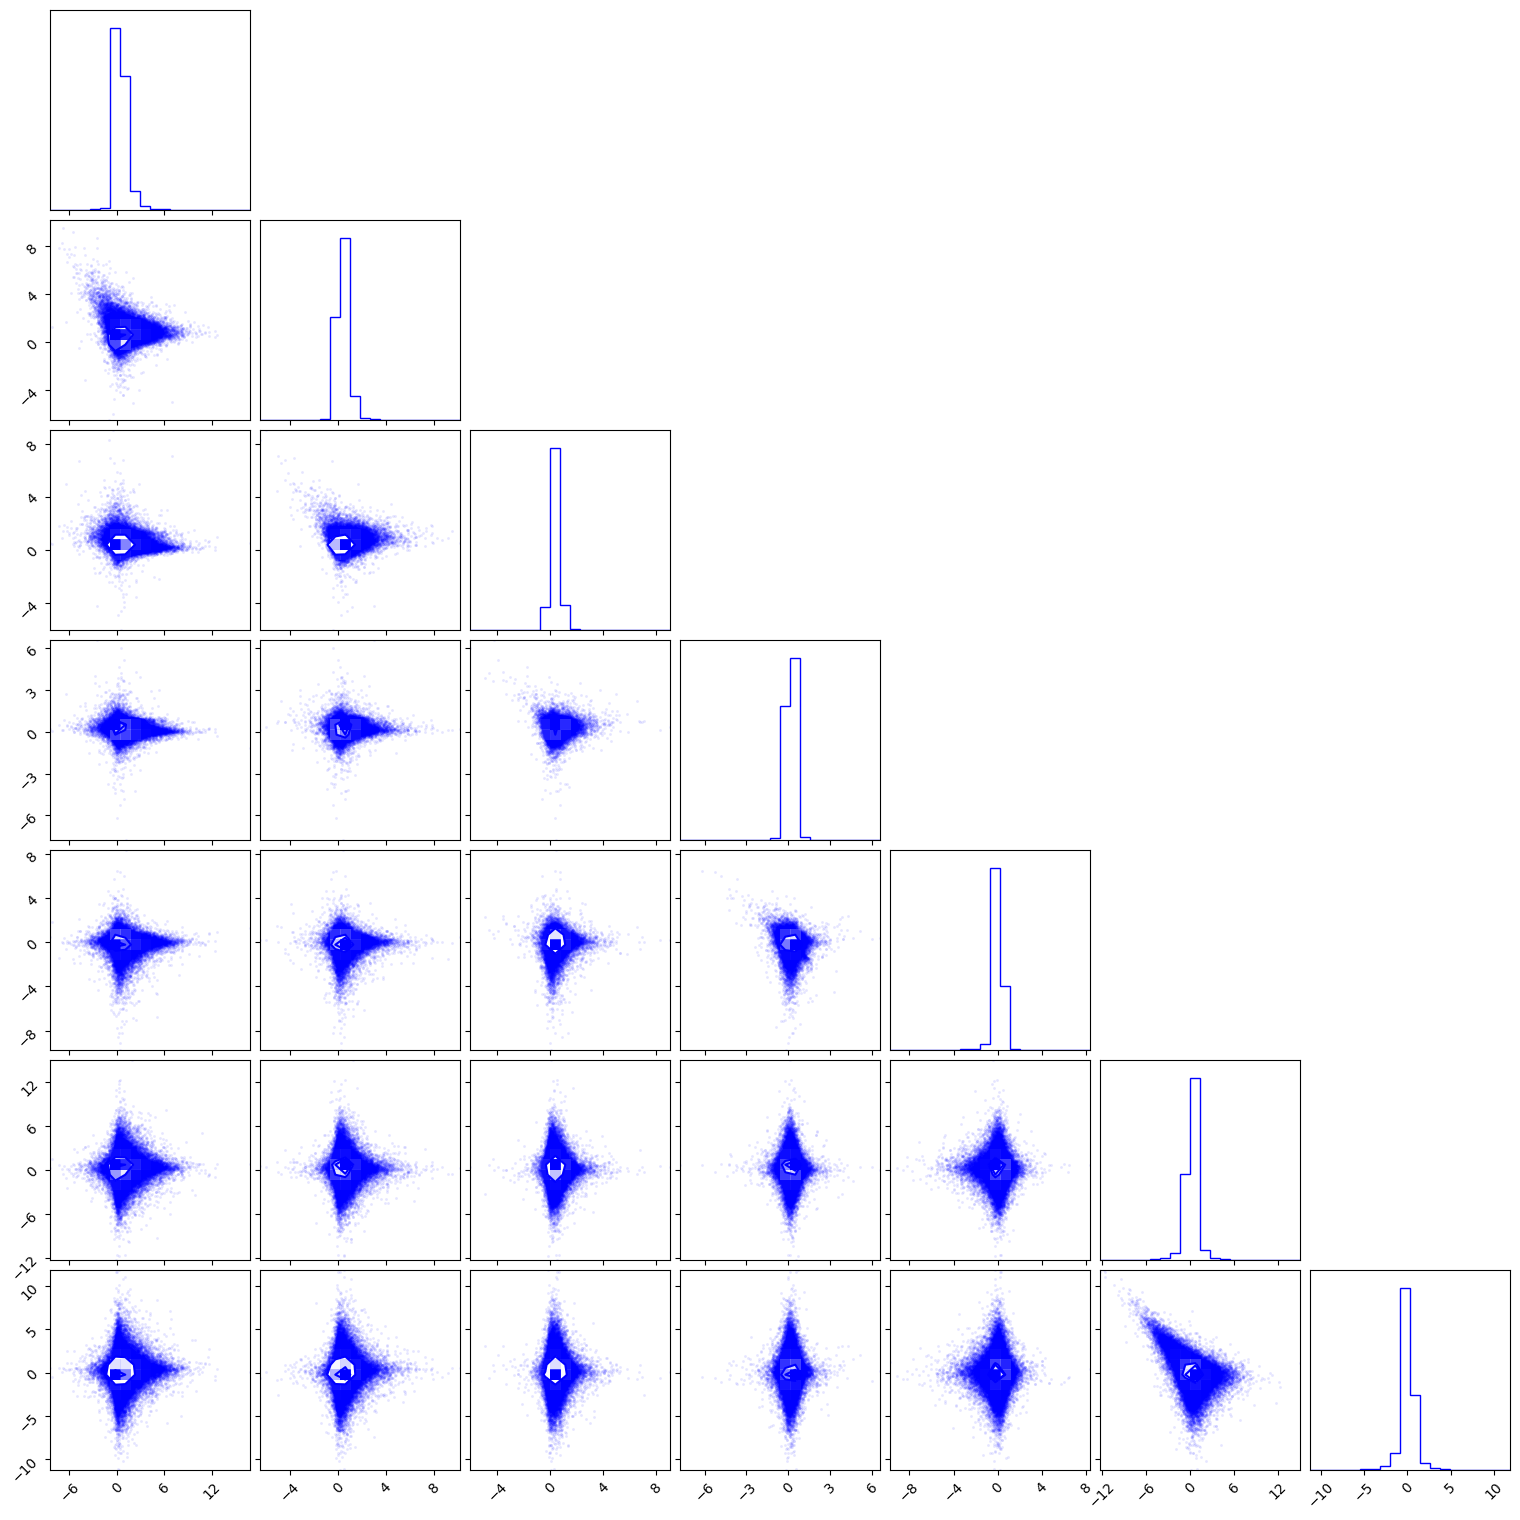

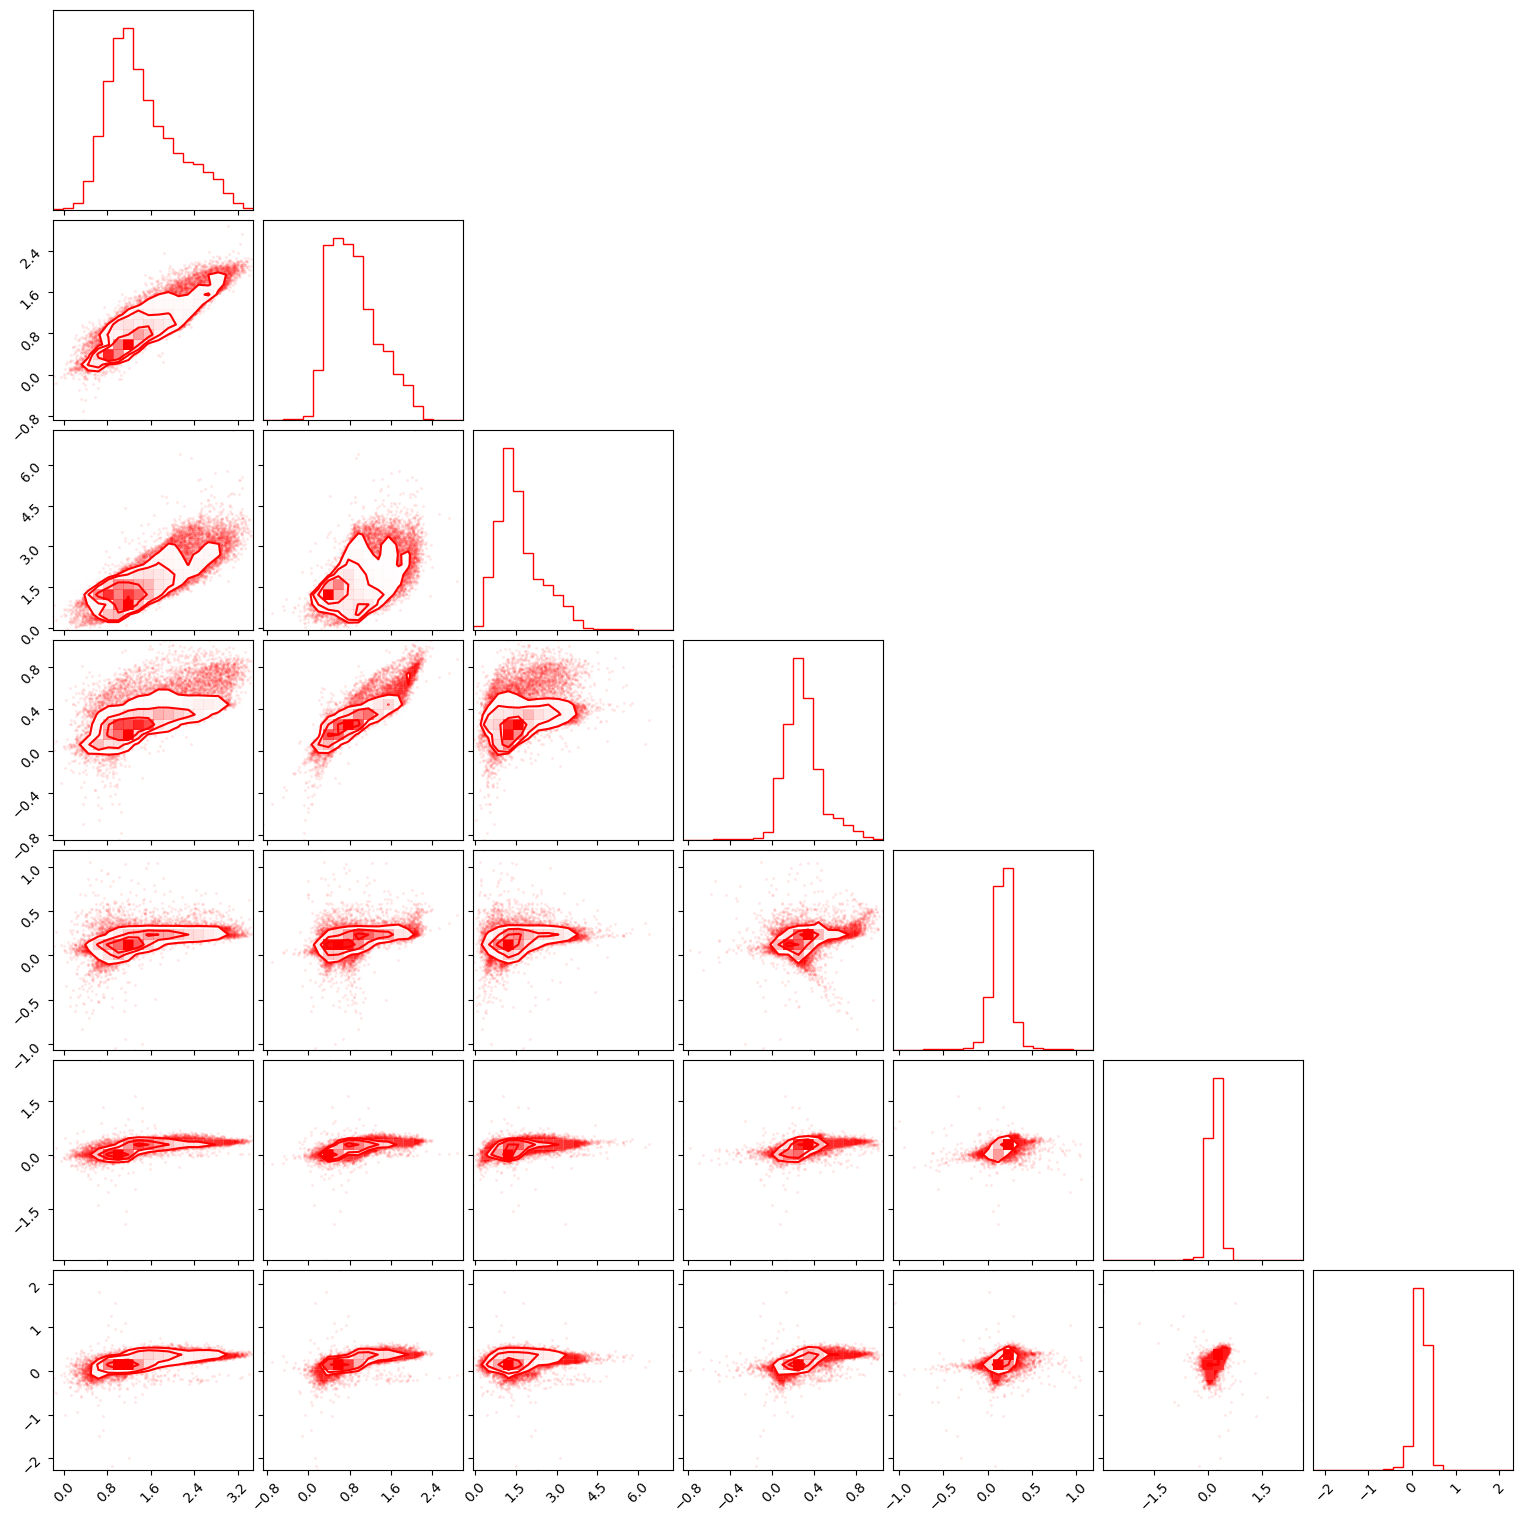

In [15]:
#defining colors before cut i<22.5
color1_before1 = cosmos2020_bright_mask4['CFHT_u_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_g_MAG_AUTO']
color2_before2 = cosmos2020_bright_mask4['HSC_g_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_r_MAG_AUTO'] 
color3_before3 = cosmos2020_bright_mask4['HSC_r_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_i_MAG_AUTO'] 
color4_before4 = cosmos2020_bright_mask4['HSC_i_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_z_MAG_AUTO']
color5_before5 = cosmos2020_bright_mask4['HSC_z_MAG_AUTO'] - cosmos2020_bright_mask4['HSC_y_MAG_AUTO']
color6_before6 = cosmos2020_bright_mask4['UVISTA_J_MAG_AUTO'] - cosmos2020_bright_mask4['UVISTA_H_MAG_AUTO']
color7_before7 = cosmos2020_bright_mask4['UVISTA_H_MAG_AUTO'] - cosmos2020_bright_mask4['UVISTA_Ks_MAG_AUTO']
color_before = np.vstack([color1_before1, color2_before2, color3_before3, color4_before4, color5_before5, color6_before6, color7_before7]).T
#defining colors after cut i>22.5
color1_after1 = cosmos2020_bright_mask5['HSC_g_MAG_AUTO'] - cosmos2020_bright_mask5['HSC_i_MAG_AUTO'] 
color2_after2 = cosmos2020_bright_mask5['HSC_r_MAG_AUTO'] - cosmos2020_bright_mask5['HSC_z_MAG_AUTO'] #r-z
color3_after3 = cosmos2020_bright_mask5['CFHT_u_MAG_AUTO'] - cosmos2020_bright_mask5['HSC_r_MAG_AUTO'] #u-r
color4_aftere4 = cosmos2020_bright_mask5['HSC_i_MAG_AUTO'] - cosmos2020_bright_mask5['HSC_z_MAG_AUTO']
color5_aftere5 = cosmos2020_bright_mask5['HSC_z_MAG_AUTO'] - cosmos2020_bright_mask5['HSC_y_MAG_AUTO']
color6_after6 = cosmos2020_bright_mask5['UVISTA_J_MAG_AUTO'] - cosmos2020_bright_mask5['UVISTA_H_MAG_AUTO']
color7_after7 = cosmos2020_bright_mask5['UVISTA_H_MAG_AUTO'] - cosmos2020_bright_mask5['UVISTA_Ks_MAG_AUTO']
color_after = np.vstack([color1_after1, color2_after2, color3_after3, color4_aftere4, color5_aftere5, color6_after6,color7_after7]).T

#plotting color distribution using corner plots
labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'J-H', 'H - Ks']
c1 = corner.corner(color_before, color="blue")
plt.savefig("color_comparison1.png", dpi=300, bbox_inches="tight")
corner.corner(color_after,color = "red")
plt.savefig("color_comparison2.png", dpi=300, bbox_inches="tight")

plt.show() 
#compare mean median for redshift
#i band is proxy for stellar mass
#slope +veg galaxy redder
#colors negative ->galaxy blue,  galaxy star forming
#

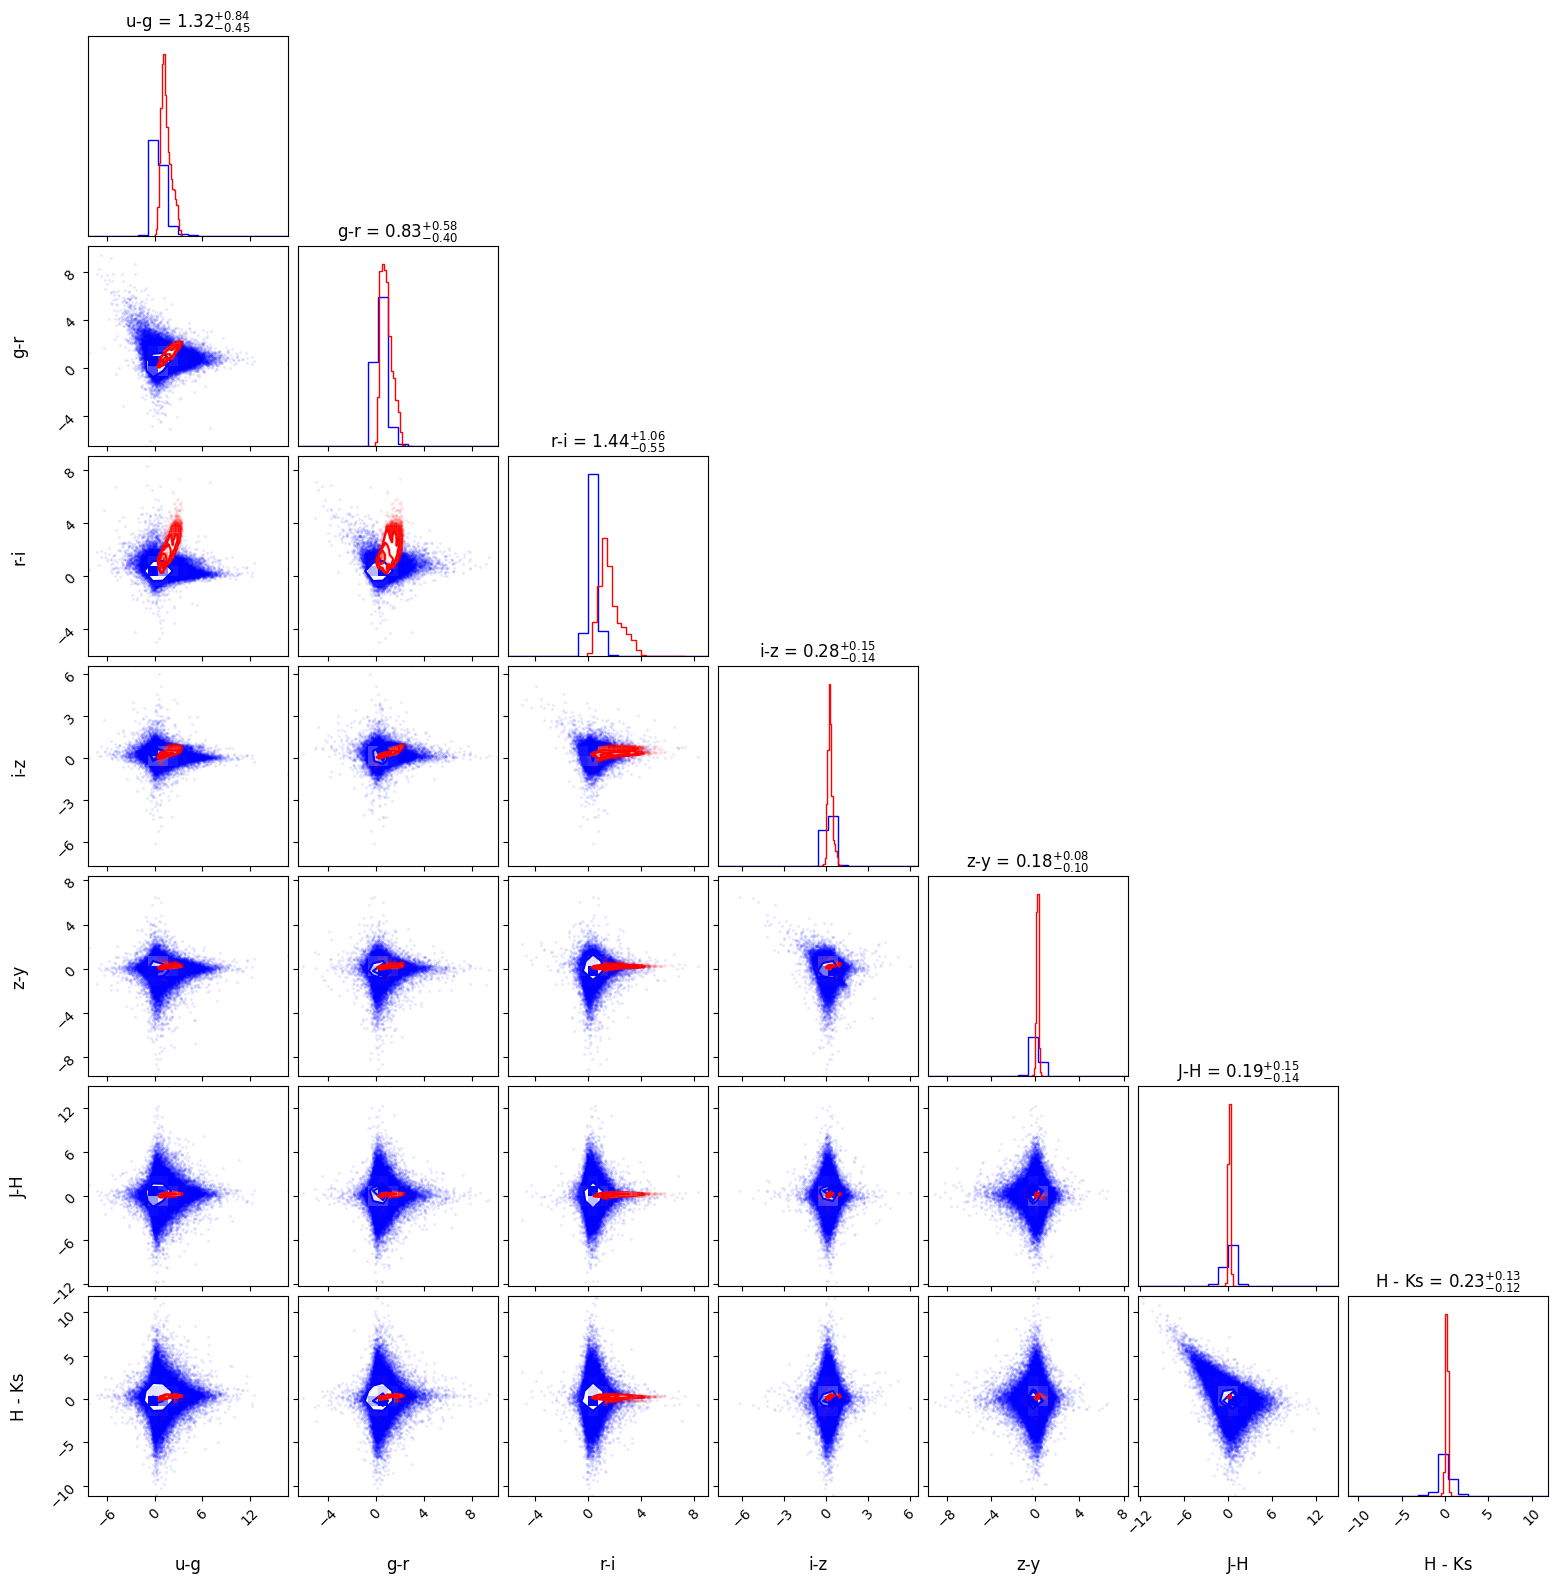

In [16]:
c = corner.corner(color_before, labels=labels, color = "blue", label_kwargs={"fontsize":12}, 
                   hist_kwargs= {"density":True}   )
corner.corner(color_after, labels=labels, fig = c, color = "red", title_fmt=".2f", show_titles=True, hist_kwargs={"density":True})
plt.savefig("color_comparisonfinal.png", dpi=300, bbox_inches="tight")


In [17]:
cosmos2020_bright_mask5

ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,FLAG_HSC,FLAG_SUPCAM,FLAG_UVISTA,FLAG_UDEEP,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX_APER2,CFHT_u_FLUXERR_APER2,CFHT_u_FLUX_APER3,CFHT_u_FLUXERR_APER3,CFHT_u_FLUX_AUTO,CFHT_u_FLUXERR_AUTO,CFHT_u_MAG_APER2,CFHT_u_MAGERR_APER2,CFHT_u_MAG_APER3,CFHT_u_MAGERR_APER3,CFHT_u_MAG_AUTO,CFHT_u_MAGERR_AUTO,CFHT_u_MAG_ISO,CFHT_u_MAGERR_ISO,CFHT_u_FLAGS,CFHT_u_IMAFLAGS_ISO,CFHT_ustar_FLUX_APER2,CFHT_ustar_FLUXERR_APER2,CFHT_ustar_FLUX_APER3,CFHT_ustar_FLUXERR_APER3,CFHT_ustar_FLUX_AUTO,CFHT_ustar_FLUXERR_AUTO,CFHT_ustar_MAG_APER2,CFHT_ustar_MAGERR_APER2,CFHT_ustar_MAG_APER3,CFHT_ustar_MAGERR_APER3,CFHT_ustar_MAG_AUTO,CFHT_ustar_MAGERR_AUTO,CFHT_ustar_MAG_ISO,CFHT_ustar_MAGERR_ISO,CFHT_ustar_FLAGS,CFHT_ustar_IMAFLAGS_ISO,HSC_g_FLUX_APER2,HSC_g_FLUXERR_APER2,HSC_g_FLUX_APER3,HSC_g_FLUXERR_APER3,HSC_g_FLUX_AUTO,HSC_g_FLUXERR_AUTO,HSC_g_MAG_APER2,HSC_g_MAGERR_APER2,HSC_g_MAG_APER3,HSC_g_MAGERR_APER3,HSC_g_MAG_AUTO,HSC_g_MAGERR_AUTO,HSC_g_MAG_ISO,HSC_g_MAGERR_ISO,HSC_g_FLAGS,HSC_g_IMAFLAGS_ISO,HSC_r_FLUX_APER2,HSC_r_FLUXERR_APER2,HSC_r_FLUX_APER3,HSC_r_FLUXERR_APER3,HSC_r_FLUX_AUTO,HSC_r_FLUXERR_AUTO,HSC_r_MAG_APER2,HSC_r_MAGERR_APER2,HSC_r_MAG_APER3,HSC_r_MAGERR_APER3,HSC_r_MAG_AUTO,HSC_r_MAGERR_AUTO,HSC_r_MAG_ISO,HSC_r_MAGERR_ISO,HSC_r_FLAGS,HSC_r_IMAFLAGS_ISO,HSC_i_FLUX_APER2,HSC_i_FLUXERR_APER2,HSC_i_FLUX_APER3,HSC_i_FLUXERR_APER3,HSC_i_FLUX_AUTO,HSC_i_FLUXERR_AUTO,HSC_i_MAG_APER2,HSC_i_MAGERR_APER2,HSC_i_MAG_APER3,HSC_i_MAGERR_APER3,HSC_i_MAG_AUTO,HSC_i_MAGERR_AUTO,HSC_i_MAG_ISO,HSC_i_MAGERR_ISO,HSC_i_FLAGS,HSC_i_IMAFLAGS_ISO,HSC_z_FLUX_APER2,HSC_z_FLUXERR_APER2,HSC_z_FLUX_APER3,HSC_z_FLUXERR_APER3,HSC_z_FLUX_AUTO,HSC_z_FLUXERR_AUTO,HSC_z_MAG_APER2,HSC_z_MAGERR_APER2,HSC_z_MAG_APER3,HSC_z_MAGERR_APER3,HSC_z_MAG_AUTO,HSC_z_MAGERR_AUTO,HSC_z_MAG_ISO,HSC_z_MAGERR_ISO,HSC_z_FLAGS,HSC_z_IMAFLAGS_ISO,HSC_y_FLUX_APER2,HSC_y_FLUXERR_APER2,HSC_y_FLUX_APER3,HSC_y_FLUXERR_APER3,HSC_y_FLUX_AUTO,HSC_y_FLUXERR_AUTO,HSC_y_MAG_APER2,HSC_y_MAGERR_APER2,HSC_y_MAG_APER3,HSC_y_MAGERR_APER3,HSC_y_MAG_AUTO,HSC_y_MAGERR_AUTO,HSC_y_MAG_ISO,HSC_y_MAGERR_ISO,HSC_y_FLAGS,HSC_y_IMAFLAGS_ISO,UVISTA_Y_FLUX_APER2,UVISTA_Y_FLUXERR_APER2,UVISTA_Y_FLUX_APER3,UVISTA_Y_FLUXERR_APER3,UVISTA_Y_FLUX_AUTO,UVISTA_Y_FLUXERR_AUTO,UVISTA_Y_MAG_APER2,UVISTA_Y_MAGERR_APER2,UVISTA_Y_MAG_APER3,UVISTA_Y_MAGERR_APER3,UVISTA_Y_MAG_AUTO,UVISTA_Y_MAGERR_AUTO,UVISTA_Y_MAG_ISO,UVISTA_Y_MAGERR_ISO,UVISTA_Y_FLAGS,UVISTA_Y_IMAFLAGS_ISO,UVISTA_J_FLUX_APER2,UVISTA_J_FLUXERR_APER2,UVISTA_J_FLUX_APER3,UVISTA_J_FLUXERR_APER3,UVISTA_J_FLUX_AUTO,UVISTA_J_FLUXERR_AUTO,UVISTA_J_MAG_APER2,UVISTA_J_MAGERR_APER2,UVISTA_J_MAG_APER3,UVISTA_J_MAGERR_APER3,UVISTA_J_MAG_AUTO,UVISTA_J_MAGERR_AUTO,UVISTA_J_MAG_ISO,UVISTA_J_MAGERR_ISO,UVISTA_J_FLAGS,UVISTA_J_IMAFLAGS_ISO,UVISTA_H_FLUX_APER2,UVISTA_H_FLUXERR_APER2,UVISTA_H_FLUX_APER3,UVISTA_H_FLUXERR_APER3,UVISTA_H_FLUX_AUTO,UVISTA_H_FLUXERR_AUTO,UVISTA_H_MAG_APER2,UVISTA_H_MAGERR_APER2,UVISTA_H_MAG_APER3,UVISTA_H_MAGERR_APER3,UVISTA_H_MAG_AUTO,UVISTA_H_MAGERR_AUTO,UVISTA_H_MAG_ISO,UVISTA_H_MAGERR_ISO,UVISTA_H_FLAGS,UVISTA_H_IMAFLAGS_ISO,UVISTA_Ks_FLUX_APER2,UVISTA_Ks_FLUXERR_APER2,UVISTA_Ks_FLUX_APER3,UVISTA_Ks_FLUXERR_APER3,UVISTA_Ks_FLUX_AUTO,UVISTA_Ks_FLUXERR_AUTO,UVISTA_Ks_MAG_APER2,UVISTA_Ks_MAGERR_APER2,UVISTA_Ks_MAG_APER3,UVISTA_Ks_MAGERR_APER3,UVISTA_Ks_MAG_AUTO,UVISTA_Ks_MAGERR_AUTO,UVISTA_Ks_MAG_ISO,UVISTA_Ks_MAGERR_ISO,UVISTA_Ks_FLAGS,UVISTA_Ks_IMAFLAGS_ISO,SC_IB427_FLUX_APER2,SC_IB427_FLUXERR_APER2,SC_IB427_FLUX_APER3,SC_IB427_FLUXERR_APER3,SC_IB427_FLUX_AUTO,SC_IB427_FLUXERR_AUTO,SC_IB427_MAG_APER2,SC_IB427_MAGERR_APER2,SC_IB427_MAG_APER3,SC_IB427_MAGERR_APER3,SC_IB427_MAG_AUTO,SC_IB427_MAGERR_AUTO,SC_IB427_MAG_ISO,SC_IB427_MAGERR_ISO,SC_IB427_FLAGS,SC_IB427_IMAFLAGS_ISO,SC_IB464_FLUX_APER2,SC_IB464_FLUXERR_APER2,SC_IB464_FLUX_APER3,SC_IB464_FLUXERR_APER3,SC_IB464_FLUX_AUTO,SC_IB464_FLUXERR_AUTO,SC_IB464_MAG_APER2,SC_IB464_MAGERR_APER2,SC_IB464_MAG_APER3,SC_IB

In [18]:
from astropy.table import Table

# 1) Start with an empty Table for CIGALE
data = Table()

# 2) Add ID and redshift from your final filtered catalog
data['#id']      = cosmos2020_bright_mask5['ID']
data['redshift'] = cosmos2020_bright_mask5['lp_zBEST']

# 3) Define your filter‐to‐column mapping (flux AUTO columns)
mapping = {
    "cfht.megacam.u":   "CFHT_u_FLUX_AUTO",
    "subaru.hsc.g": "HSC_g_FLUX_AUTO",
    "subaru.hsc.r": "HSC_r_FLUX_AUTO",
    "subaru.hsc.i": "HSC_i_FLUX_AUTO",
    "subaru.hsc.z": "HSC_z_FLUX_AUTO",
    "subaru.hsc.y": "HSC_y_FLUX_AUTO",
    "vista.j":         "UVISTA_J_FLUX_AUTO",
    "vista.h":         "UVISTA_H_FLUX_AUTO",
    "vista.ks":        "UVISTA_Ks_FLUX_AUTO"
}

# 4) Loop over the mapping, sourcing from cosmos2020_bright_mask5
for cigale_name, col in mapping.items():
    # the flux
    data[cigale_name] = cosmos2020_bright_mask5[col]
    # the 1σ error
    err_col = col.replace("_FLUX_AUTO", "_FLUXERR_AUTO")
    data[cigale_name + "_err"] = cosmos2020_bright_mask5[err_col]

# 5) Write out in ASCII format for CIGALE
data.write("data_cigale.txt",
           format="ascii.basic",
           delimiter=" ",
           comment="#",
           overwrite=True)
data

#id,redshift,cfht.megacam.u,cfht.megacam.u_err,subaru.hsc.g,subaru.hsc.g_err,subaru.hsc.r,subaru.hsc.r_err,subaru.hsc.i,subaru.hsc.i_err,subaru.hsc.z,subaru.hsc.z_err,subaru.hsc.y,subaru.hsc.y_err,vista.j,vista.j_err,vista.h,vista.h_err,vista.ks,vista.ks_err
,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
203073,0.936,0.62622744,0.009018638,1.0487405,0.012128791,1.9379311,0.01753671,4.268662,0.020579405,6.624622,0.034007434,7.7282286,0.057474233,12.0724945,0.23411317,15.094372,0.27431035,22.956528,0.17761447
203771,0.6513,1.2751719,0.013927636,2.4710143,0.01812619,5.5376024,0.02727264,10.47448,0.031340327,13.099535,0.0482597,15.734288,0.08557213,21.415895,0.37104592,25.640326,0.39718148,34.191784,0.24097064
204116,0.5429,0.96602416,0.008594483,1.5645442,0.012760065,3.342644,0.01828178,4.8855977,0.018780641,6.0300856,0.027704684,6.8366985,0.042590685,7.7659135,0.076300435,9.072667,0.1081446,10.111294,0.17167571
204140,0.7041,0.79362744,0.006652018,1.2990907,0.0115070585,2.3874984,0.016470397,4.564218,0.019173313,5.853197,0.028442781,6.844929,0.04632341,8.937567,0.119204596,10.866454,0.16308981,13.28591,0.10265328
204681,0.5309,0.09390757,0.0108322725,1.0938392,0.013091908,4.723499,0.024224617,11.268295,0.030040504,15.661492,0.046777558,18.25529,0.07445151,24.714674,0.21637714,34.225132,0.27726853,43.251877,0.17575303
204708,0.6044,1.6546416,0.010559618,2.293711,0.015544424,3.9388325,0.021059396,5.6664925,0.02157954,6.340803,0.031895943,7.2588964,0.05417692,8.466906,0.23336907,9.2745285,0.3016466,10.220044,0.2002203
204736,0.8397,0.21305268,0.008408188,0.48570183,0.00885388,1.4879987,0.013549752,4.845655,0.01869074,7.9786873,0.03043709,9.3188715,0.044686098,12.336838,0.076003514,15.19971,0.11069735,19.964254,0.1711356
204751,0.1506,1.6093005,0.017100528,4.147889,0.022397004,6.8355823,0.03178377,8.73816,0.034180794,9.830117,0.052376118,10.521215,0.10217916,11.183153,0.084148124,11.510935,0.12741861,11.193009,0.20187628


In [ ]:
# ###_FLUX_AUTO>0 and i<22.5
#.copy()
#.columns()
#if 'AUTO' in column pass
#else copy_cosmos.removez_column(name)
#.rename_column(oldname, new name)
#from astop.table import Column
#Colummn(name = 'id', np.aramge(1,len(copy_cosmos), 1))
#same for redhsift
#copy_cosmos.write('.txt', format = ascii , overwrite =True)

In [55]:
copy_cosmos = cosmos2020_bright_mask5.copy()
copy_cosmos.colnames

['ID',
 'ALPHA_J2000',
 'DELTA_J2000',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'FLAG_HSC',
 'FLAG_SUPCAM',
 'FLAG_UVISTA',
 'FLAG_UDEEP',
 'FLAG_COMBINED',
 'EBV_MW',
 'CFHT_u_FLUX_APER2',
 'CFHT_u_FLUXERR_APER2',
 'CFHT_u_FLUX_APER3',
 'CFHT_u_FLUXERR_APER3',
 'CFHT_u_FLUX_AUTO',
 'CFHT_u_FLUXERR_AUTO',
 'CFHT_u_MAG_APER2',
 'CFHT_u_MAGERR_APER2',
 'CFHT_u_MAG_APER3',
 'CFHT_u_MAGERR_APER3',
 'CFHT_u_MAG_AUTO',
 'CFHT_u_MAGERR_AUTO',
 'CFHT_u_MAG_ISO',
 'CFHT_u_MAGERR_ISO',
 'CFHT_u_FLAGS',
 'CFHT_u_IMAFLAGS_ISO',
 'CFHT_ustar_FLUX_APER2',
 'CFHT_ustar_FLUXERR_APER2',
 'CFHT_ustar_FLUX_APER3',
 'CFHT_ustar_FLUXERR_APER3',
 'CFHT_ustar_FLUX_AUTO',
 'CFHT_ustar_FLUXERR_AUTO',
 'CFHT_ustar_MAG_APER2',
 'CFHT_ustar_MAGERR_APER2',
 'CFHT_ustar_MAG_APER3',
 'CFHT_ustar_MAGERR_APER3',
 'CFHT_ustar_MAG_AUTO',
 'CFHT_ustar_MAGERR_AUTO',
 'CFHT_ustar_MAG_ISO',
 'CFHT_ustar_MAGERR_ISO',
 'CFHT_ustar_FLAGS',
 'CFHT_ustar_IMAFLAGS_IS

In [56]:
for name in copy_cosmos.colnames:
    if "FLUX_AUTO" in name:
        pass
    else:
        copy_cosmos.remove_column(name)
copy_cosmos

CFHT_u_FLUX_AUTO,CFHT_ustar_FLUX_AUTO,HSC_g_FLUX_AUTO,HSC_r_FLUX_AUTO,HSC_i_FLUX_AUTO,HSC_z_FLUX_AUTO,HSC_y_FLUX_AUTO,UVISTA_Y_FLUX_AUTO,UVISTA_J_FLUX_AUTO,UVISTA_H_FLUX_AUTO,UVISTA_Ks_FLUX_AUTO,SC_IB427_FLUX_AUTO,SC_IB464_FLUX_AUTO,SC_IA484_FLUX_AUTO,SC_IB505_FLUX_AUTO,SC_IA527_FLUX_AUTO,SC_IB574_FLUX_AUTO,SC_IA624_FLUX_AUTO,SC_IA679_FLUX_AUTO,SC_IB709_FLUX_AUTO,SC_IA738_FLUX_AUTO,SC_IA767_FLUX_AUTO,SC_IB827_FLUX_AUTO,SC_NB711_FLUX_AUTO,SC_NB816_FLUX_AUTO,UVISTA_NB118_FLUX_AUTO,SC_B_FLUX_AUTO,SC_gp_FLUX_AUTO,SC_V_FLUX_AUTO,SC_rp_FLUX_AUTO,SC_ip_FLUX_AUTO,SC_zp_FLUX_AUTO,SC_zpp_FLUX_AUTO
uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
0.62622744,0.5918796,1.0487405,1.9379311,4.268662,6.624622,7.7282286,7.1513367,12.0724945,15.094372,22.956528,0.6014594,0.6729075,0.9419414,0.91999954,1.1824425,1.6329414,1.8184218,2.5290885,2.5259082,3.495726,4.096234,5.1091065,2.4005256,5.034853,nan,0.7008234,0.8632764,1.445938,1.9015015,4.0675025,7.01574,7.1165943
1.2751719,1.3115615,2.4710143,5.5376024,10.47448,13.099535,15.734288,15.410466,21.415895,25.640326,34.191784,1.6560764,1.3524613,2.3724697,2.8146625,2.859,3.3592625,5.4185343,9.534949,8.528782,9.225722,10.933196,11.686633,9.089092,11.165312,nan,1.7743895,2.203281,3.5053806,5.4924192,10.281147,13.895927,14.350124
0.96602416,0.9588833,1.5645442,3.342644,4.8855977,6.0300856,6.8366985,7.672093,7.7659135,9.072667,10.111294,1.1480391,1.2772651,1.5277468,1.7075524,1.5810184,2.351431,3.4161282,4.7408977,4.232612,4.657864,4.989294,5.3075423,4.4335737,4.999879,6.959438,1.1815373,1.2667353,2.2021456,3.31858,4.7572393,6.157801,6.3704724
0.79362744,0.8282746,1.2990907,2.3874984,4.564218,5.853197,6.844929,6.859271,8.937567,10.866454,13.28591,0.9715874,0.88634986,1.2203957,1.3910623,1.4901977,1.950884,2.2819629,3.5778687,3.6035044,4.2126713,4.291817,5.0651946,4.103414,4.8439245,nan,0.9804463,1.1926231,1.777442,3.2190545,4.5217633,6.574783,6.5690618
0.09390757,0.15568167,1.0938392,4.723499,11.268295,15.661492,18.25529,19.40631,24.714674,34.225132,43.251877,0.28399524,0.6083405,1.0943294,1.439343,1.6577073,2.4557061,4.9148383,8.491592,8.678188,9.653822,10.1916275,12.685393,9.73753,12.164395,nan,0.5373871,0.91758984,2.1035092,4.8140225,10.8189745,16.361618,16.777447
1.6546416,1.6142775,2.293711,3.9388325,5.6664925,6.340803,7.2588964,7.029872,8.466906,9.2745285,10.220044,1.9602052,2.1170359,2.0595324,2.1979675,2.452337,2.3358357,3.8310804,5.3164845,4.8661256,5.4117737,5.583386,5.717105,4.7951374,5.4396696,nan,1.7503679,1.9494644,2.7001698,3.83664,5.5791674,6.634941,6.577766
0.21305268,0.23828097,0.48570183,1.4879987,4.845655,7.9786873,9.3188715,9.6346655,12.336838,15.19971,19.964254,0.32170072,0.5107836,0.45532015,0.5957073,0.52356184,1.1383443,1.3990567,2.1168969,2.5872843,3.7005553,5.099301,5.991024,2.8209472,6.0077157,10.162443,0.30875987,0.49391446,0.7884342,1.5304449,4.743151,8.56749,8.715925
1.6093005,1.6343933,4.147889,6.8355823,8.73816,9.830117,10.521215,10.647467,11.183153,11.510935,11.193009,2.4968328,3.6884751,4.106859,4.3971977,4.902649,5.488636,6.501974,8.855714,7.4476304,7.9223633,8.884994,8.760887,7.695938,8.711611,11.639761,2.8056536,3.6470852,5.9747734,6.445073,8.55345,10.180304,9.989883
